In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# alist = list([1,2,3,4])
# #alist.append()

# class Test:
#     def __init__(self, name):
#         self.name = name
#     #method 
#     def printname(self):
#         print(f"the name is {self.name}")

In [5]:
# test_object = Test('john')
# test_object2 = Test('Mary')

In [6]:
# test_object2.printname

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#sqlite - stand alone
#postgres
#redshift
#oracle
#microsoft sql server
#mysql

In [9]:
# conn = engine.connect()
# test = conn.execute("SELECT * FROM measurement")

# test.fetchall()

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
print(Station)

<class 'sqlalchemy.ext.automap.station'>


In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
data = session.query(Measurement)
print(data)
# for i in data:
#     print(i.date)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


In [16]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [17]:
last_12month = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [38]:
#last_12month

a = [{k:v} for k,v in last_12month]
#[2,4, 6]per
a_list = []
for k, v in last_12month:
    a_list.append({k:v})

<IPython.core.display.Javascript object>


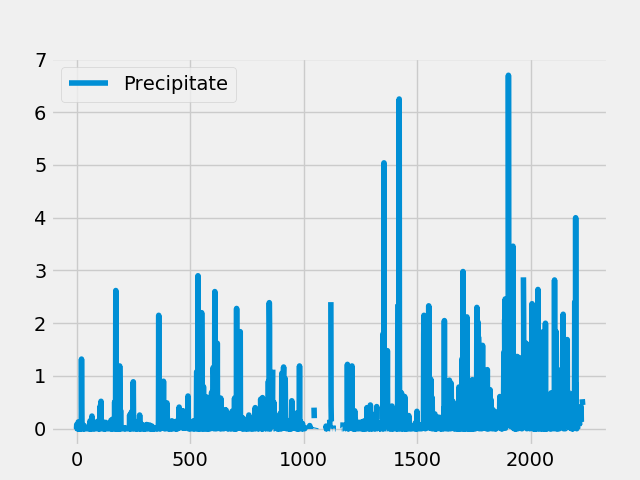

In [18]:
df = pd.DataFrame(last_12month, columns = ['Date', 'Precipitate'])

df.head()

df.plot()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitate
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
data = session.query(Station)
print(data)

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station


In [21]:
# How many stations are available in this dataset?
count_station = session.query(Station.name).all()

print(len(count_station))

9


In [22]:
# What are the most active stations?
active_data = session.query(Measurement.station, Measurement.id).all()

active_df = pd.DataFrame(active_data, columns = ['Station', 'ID'])

station_grpcount = active_df.groupby('Station').count().sort_values(by='ID',ascending=False)

station_grpcount


# List the stations and the counts in descending order.


,ID
Station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

name_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

name_temp



[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


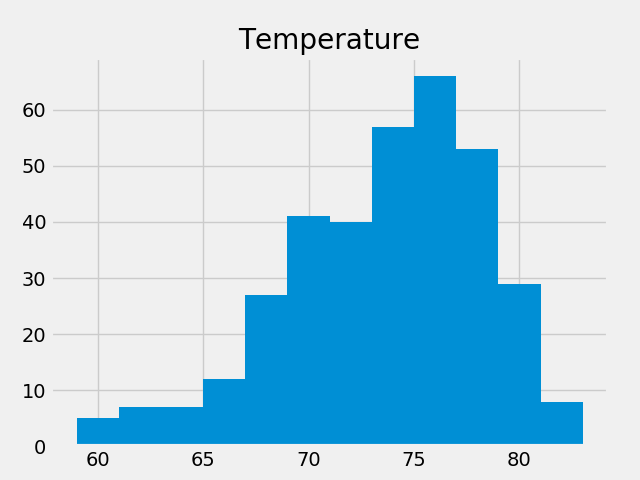

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f4f57f0>]],
      dtype=object)

In [24]:
# Choose the station with the highest number of temperature observations.

num_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()

temp_df = pd.DataFrame(num_temp, columns = ['Temperature'])

temp_df

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df.hist(bins=12)

In [25]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 

import datetime as dt

prev_year_start = dt.date(2018, 1, 1) - dt.timedelta(days=365)


In [27]:

prev_year_end = dt.date(2018, 1, 7) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

# for your trip using the previous year's data for those same dates.

62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


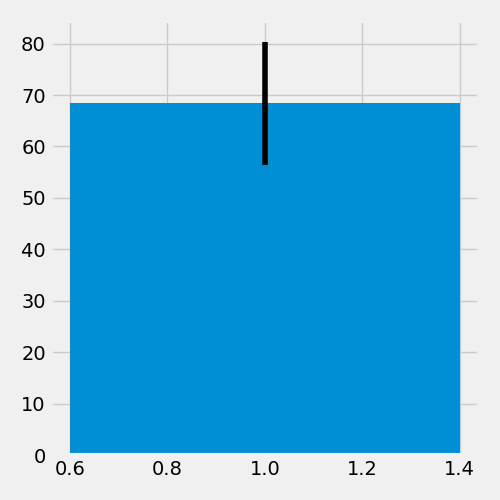

In [28]:
# Plot the results from your previous query as a bar chart. 
x = 1
y = tavg
yerr = tmax-tmin

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=(5,5))

plt.bar(x, y, yerr=yerr)
plt.tight_layout()
plt.show()

In [29]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [33]:
# Plot the daily normals as an area plot with `stacked=False`
